# Animal Condition Classification

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d gracehephzibahm/animal-disease

Dataset URL: https://www.kaggle.com/datasets/gracehephzibahm/animal-disease
License(s): Community Data License Agreement - Sharing - Version 1.0
  0%|                                               | 0.00/11.7k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 11.7k/11.7k [00:00<00:00, 1.17MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Animal Condition Classification/animal-disease.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Animal Condition Classification')
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [6]:
df.shape

(871, 7)

In [7]:
df.size

6097

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [9]:
df.describe().T

,count,unique,top,freq
AnimalName,871,46,Buffaloes,129
symptoms1,871,232,Fever,257
symptoms2,871,230,Diarrhea,119
symptoms3,871,229,Coughing,95
symptoms4,871,217,Weight loss,117
symptoms5,871,203,Pains,99
Dangerous,869,2,Yes,849


In [10]:
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(28)

In [12]:
df.nunique()

AnimalName     46
symptoms1     232
symptoms2     230
symptoms3     229
symptoms4     217
symptoms5     203
Dangerous       2
dtype: int64

In [13]:
df['Dangerous'].value_counts()

Dangerous
Yes    849
No      20
Name: count, dtype: int64

## Data Preprocessing

In [15]:
# Dropping Duplicates

df.drop_duplicates()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


In [16]:
# Dropping na values

df.dropna(inplace=True)

In [17]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [20]:
X = df.drop(columns=['Dangerous'])
y = df['Dangerous']

In [21]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [22]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [23]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [25]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8117647058823529, 0.7970588235294118, 0.9764705882352941, 0.9823529411764705, 0.9088235294117647, 0.9764705882352941, 0.9764705882352941, 0.9794117647058823, 0.9411764705882353]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       164
           1       0.86      0.76      0.81       176

    accuracy                           0.81       340
   macro avg       0.82      0.81      0.81       340
weighted avg       0.82      0.81      0.81       340

Confusion Matrix:
 [[143  21]
 [ 43 133]]


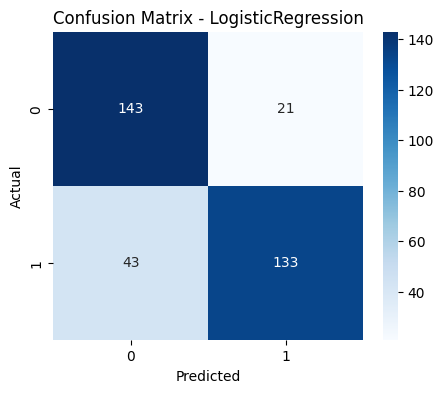

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       164
           1       0.88      0.70      0.78       176

    accuracy                           0.80       340
   macro avg       0.81      0.80      0.80       340
weighted avg       0.81      0.80      0.80       340

Confusion Matrix:
 [[147  17]
 [ 52 124]]


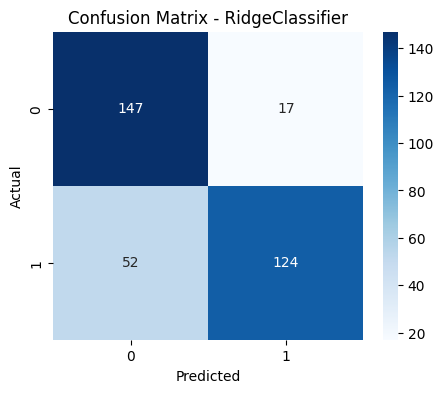

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.99      0.96      0.98       176

    accuracy                           0.98       340
   macro avg       0.98      0.98      0.98       340
weighted avg       0.98      0.98      0.98       340

Confusion Matrix:
 [[163   1]
 [  7 169]]


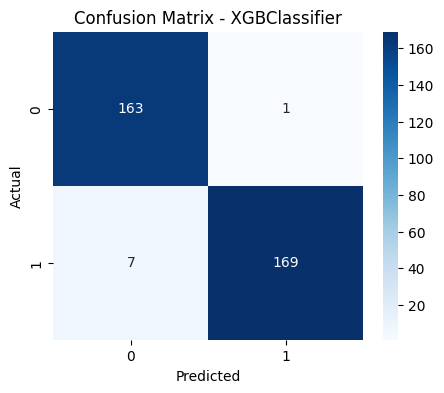

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.99      0.97      0.98       176

    accuracy                           0.98       340
   macro avg       0.98      0.98      0.98       340
weighted avg       0.98      0.98      0.98       340

Confusion Matrix:
 [[163   1]
 [  6 170]]


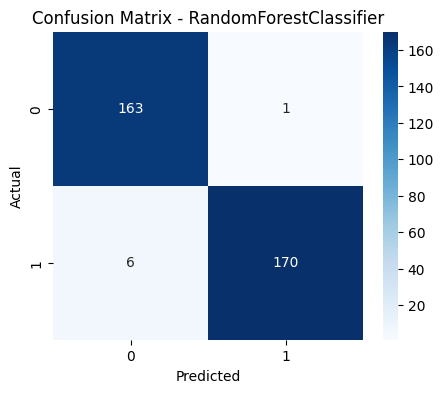

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       164
           1       0.91      0.91      0.91       176

    accuracy                           0.91       340
   macro avg       0.91      0.91      0.91       340
weighted avg       0.91      0.91      0.91       340

Confusion Matrix:
 [[149  15]
 [ 16 160]]


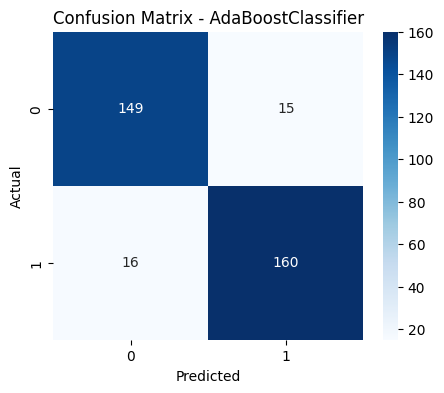

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.99      0.96      0.98       176

    accuracy                           0.98       340
   macro avg       0.98      0.98      0.98       340
weighted avg       0.98      0.98      0.98       340

Confusion Matrix:
 [[163   1]
 [  7 169]]


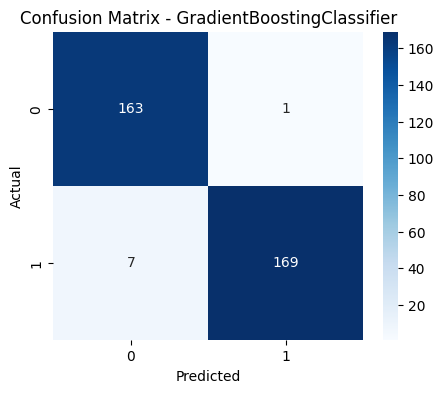

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       164
           1       0.99      0.95      0.97       176

    accuracy                           0.97       340
   macro avg       0.97      0.97      0.97       340
weighted avg       0.97      0.97      0.97       340

Confusion Matrix:
 [[163   1]
 [  9 167]]


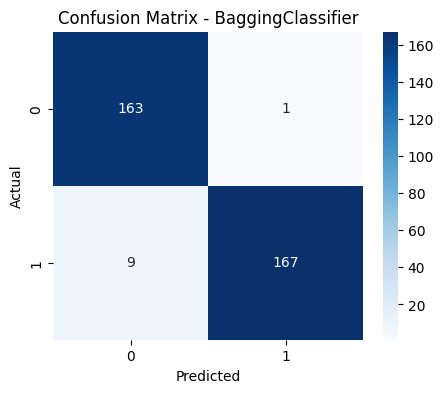

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.99      0.96      0.98       176

    accuracy                           0.98       340
   macro avg       0.98      0.98      0.98       340
weighted avg       0.98      0.98      0.98       340

Confusion Matrix:
 [[163   1]
 [  7 169]]


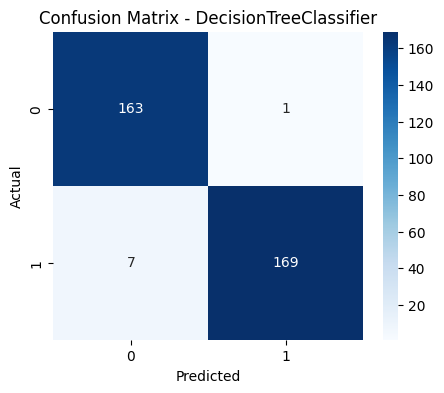

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       164
           1       1.00      0.89      0.94       176

    accuracy                           0.94       340
   macro avg       0.95      0.94      0.94       340
weighted avg       0.95      0.94      0.94       340

Confusion Matrix:
 [[164   0]
 [ 20 156]]


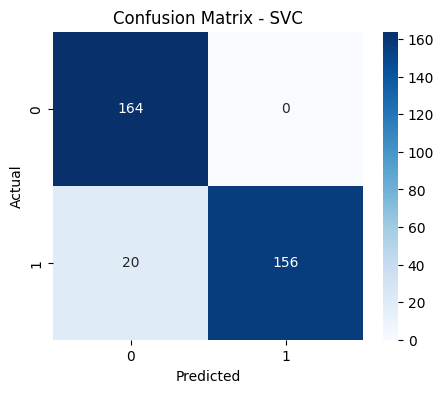

In [26]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()